In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import statsmodels.formula.api as smf 
import statsmodels.api as sm
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#Rename All Columns
df.rename({'R&D Spend':'RND','Administration':'Admin','Marketing Spend':'Mkt_Spend','State':'State','Profit':'Profit'},axis=1,inplace=True
         )

In [6]:
#Duplicate Ccolumns
df[df.duplicated()]

,RND,Admin,Mkt_Spend,State,Profit


In [7]:
df.describe()

,RND,Admin,Mkt_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

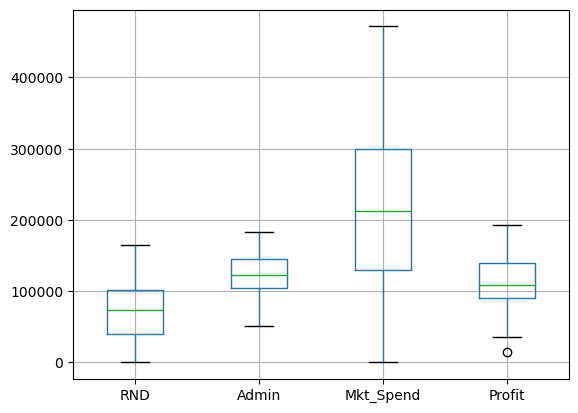

In [8]:
df.boxplot()

In [9]:
df.corr()

,RND,Admin,Mkt_Spend,Profit
RND,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Mkt_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

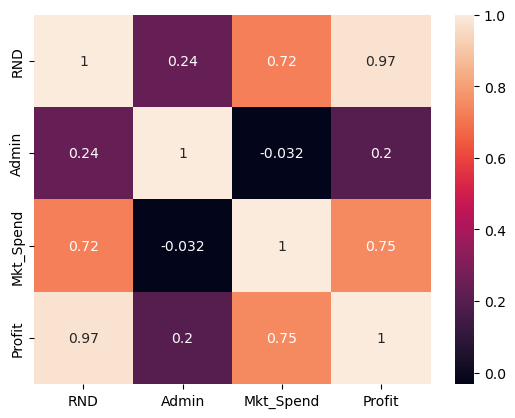

In [10]:
sns.heatmap(df.corr(),annot=True)

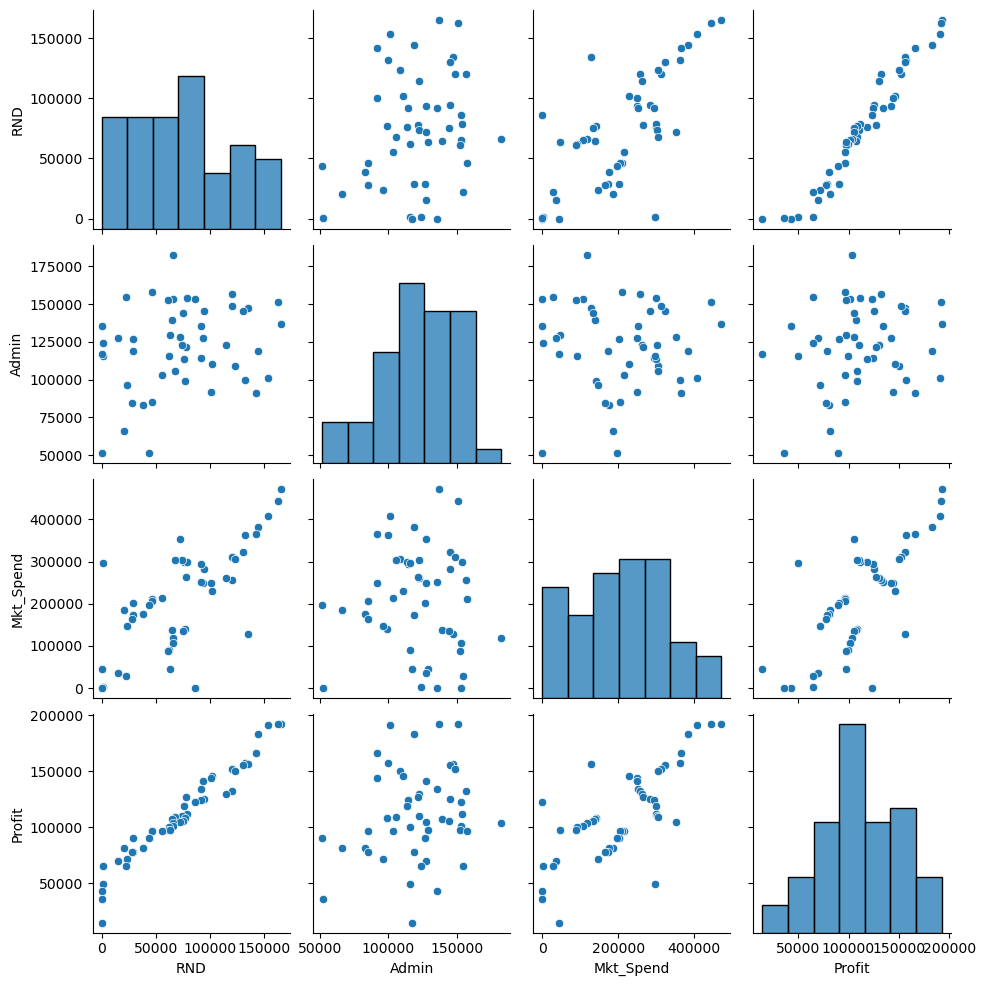

In [11]:
sns.pairplot(df)

In [12]:
model=smf.ols('Profit~RND+Admin+Mkt_Spend',data=df).fit()

In [13]:
model.params

Intercept    50122.192990
RND              0.805715
Admin           -0.026816
Mkt_Spend        0.027228
dtype: float64

In [14]:
import numpy as np
model.tvalues,np.round(model.pvalues,5)

(Intercept     7.626218
 RND          17.846374
 Admin        -0.525507
 Mkt_Spend     1.655077
 dtype: float64,
 Intercept    0.00000
 RND          0.00000
 Admin        0.60176
 Mkt_Spend    0.10472
 dtype: float64)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        19:13:45   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RND            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mkt_Spend      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [17]:
model_Admin=smf.ols('Profit~Admin',data=df).fit()
model_Admin.tvalues,np.round(model_Admin.pvalues,5)

(Intercept    3.040044
 Admin        1.419493
 dtype: float64,
 Intercept    0.00382
 Admin        0.16222
 dtype: float64)

In [18]:
model_MKT=smf.ols('Profit~Mkt_Spend',data=df).fit()
model_MKT.tvalues,model_MKT.pvalues

(Intercept    7.808356
 Mkt_Spend    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Mkt_Spend    4.381073e-10
 dtype: float64)

In [19]:
model_Admin_Mkts=smf.ols('Profit~Admin+Mkt_Spend',data=df).fit()
model_Admin_Mkts.tvalues,model_Admin_Mkts.pvalues

(Intercept    1.142741
 Admin        2.467779
 Mkt_Spend    8.281039
 dtype: float64,
 Intercept    2.589341e-01
 Admin        1.729198e-02
 Mkt_Spend    9.727245e-11
 dtype: float64)

# VIF: Variance inflation FActor 
#Model Validation

#Collinearity check n residual analysis

In [20]:
df.columns

Index(['RND', 'Admin', 'Mkt_Spend', 'State', 'Profit'], dtype='object')

In [21]:
r=smf.ols('RND~Admin+Mkt_Spend',data=df).fit().rsquared
vif_RND=1/(1-r)

a=smf.ols('Admin~RND+Mkt_Spend',data=df).fit().rsquared
vif_Admin=1/(1-a)

m=smf.ols('Mkt_Spend~RND+Admin',data=df).fit().rsquared
vif_MktSpend=1/(1-m)
print(vif_RND,vif_Admin,vif_MktSpend)
VIFData={'Variables':['RND','Admin','Mkt_Spend'],'vif':[vif_RND,vif_Admin,vif_MktSpend]}
dfVIF=pd.DataFrame(VIFData)
dfVIF

2.4689030699947017 1.1750910070550458 2.3267732905308773


,Variables,vif
0,RND,2.468903
1,Admin,1.175091
2,Mkt_Spend,2.326773


In [22]:
#take all columns/feATURES BECAUSE VIF value of column are < 20S

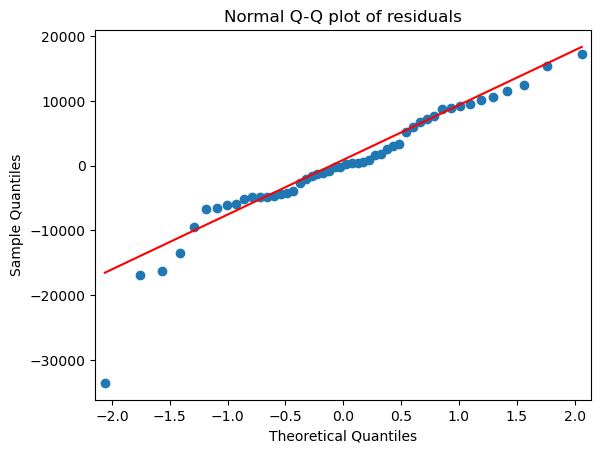

In [27]:
#model
# Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

eval_env: 1


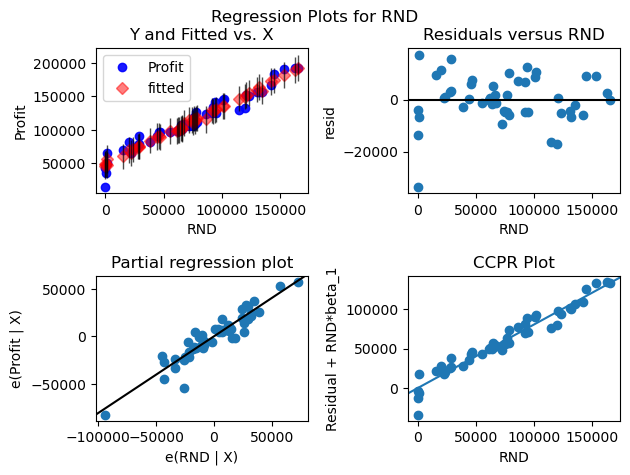

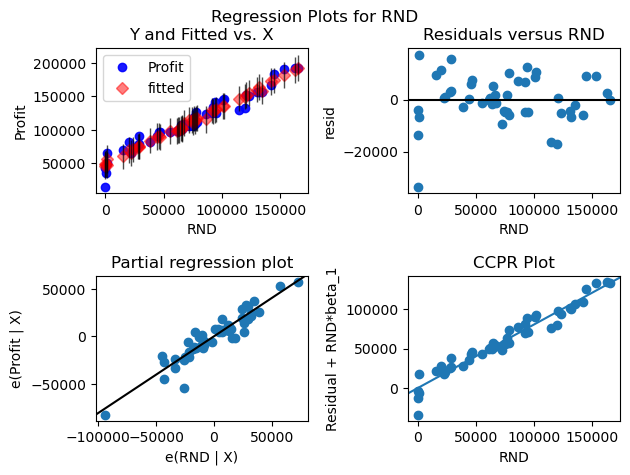

In [24]:
sm.graphics.plot_regress_exog(model,'RND')

eval_env: 1


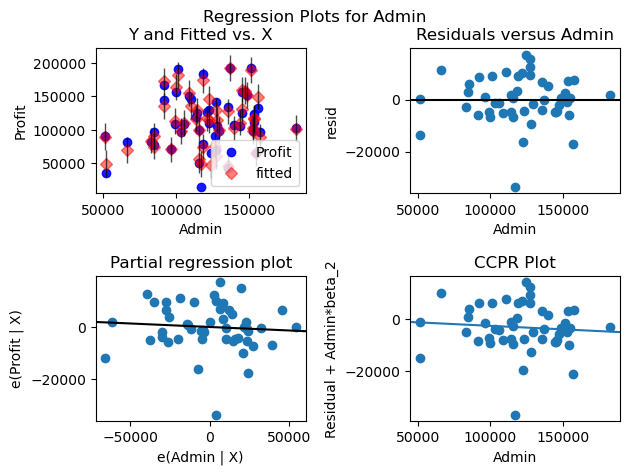

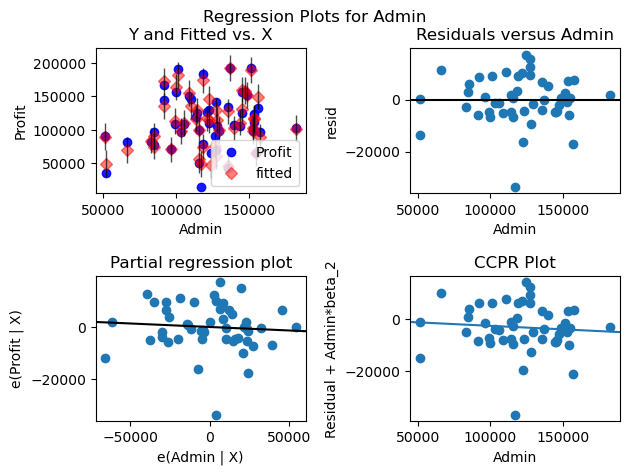

In [25]:
sm.graphics.plot_regress_exog(model,'Admin')

eval_env: 1


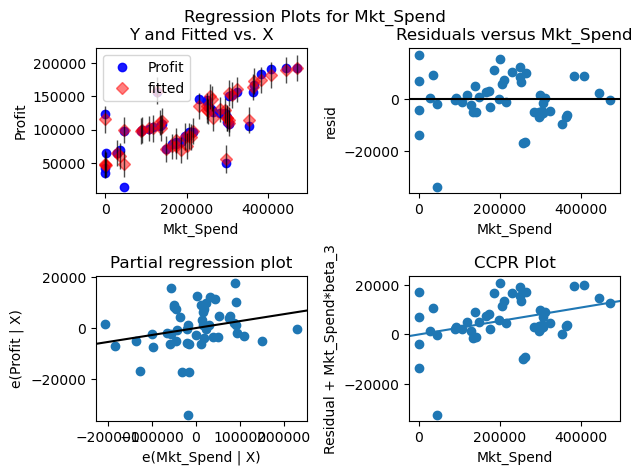

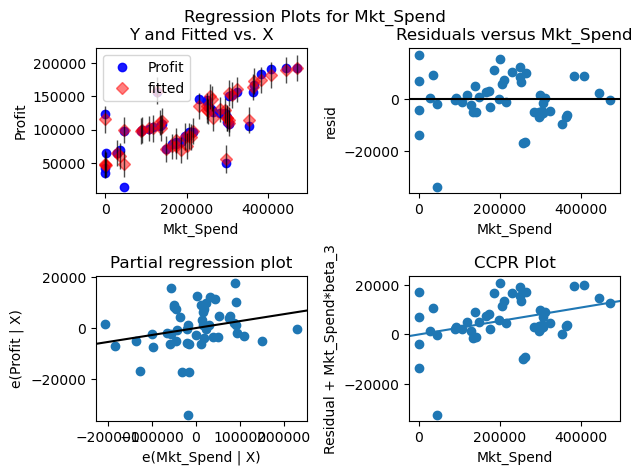

In [26]:
sm.graphics.plot_regress_exog(model,'Mkt_Spend')

In [28]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

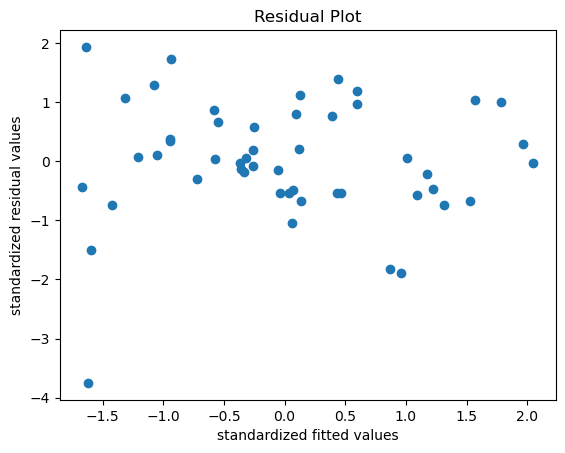

In [30]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [32]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

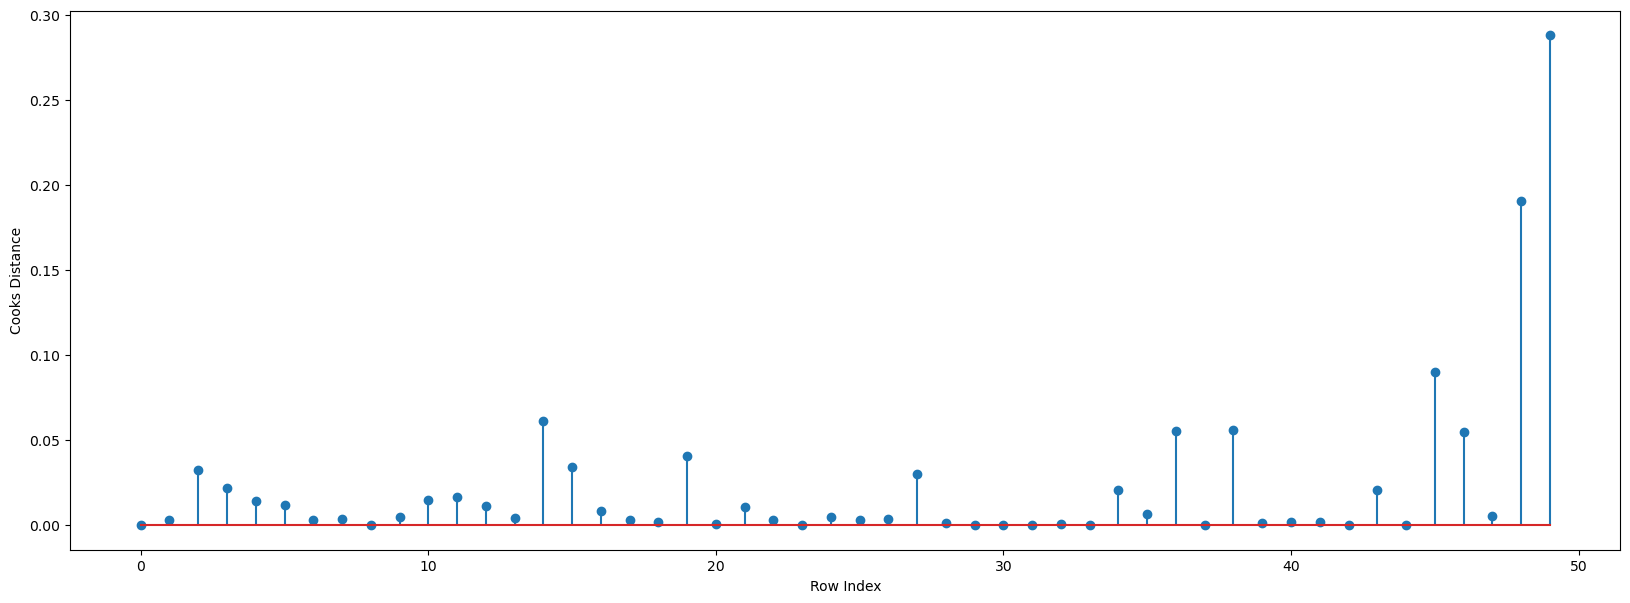

In [34]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

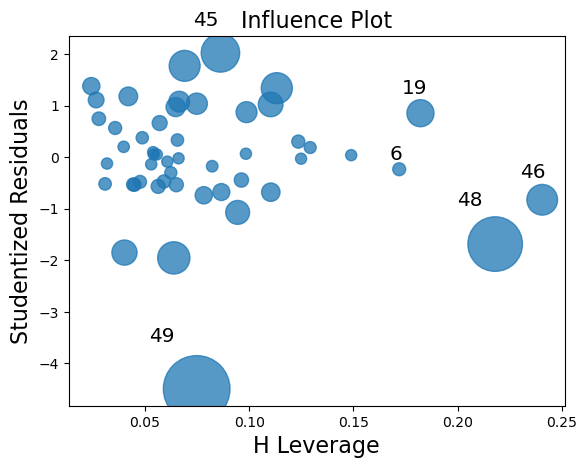

In [36]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()